# CHAPTER 2 - Deep Neural Networks Explained
_pg. 17-30_

The example in this chapter uses a deep nerual network to approximate $y = x^{2}$.

So $x$ will be the observed value and $y$ will be the target value.

## Generating Data for Use with a Deep Neural Network

In [31]:
# p. 21
import numpy as np
import pandas as pd
import random

In [32]:
random.seed(2016)

In [33]:
sample_size = 50

In [34]:
samples = random.sample(range(-10000,10000), sample_size)
x = pd.Series(samples) / 10000
y = x**2

## Exploring the Sample Data

In [35]:
print x.head(10)

0    0.4758
1   -0.1026
2    0.7847
3    0.7506
4   -0.4870
5    0.3657
6    0.8647
7   -0.8361
8   -0.4067
9   -0.8568
dtype: float64


In [36]:
print y.head(10)

0    0.226386
1    0.010527
2    0.615754
3    0.563400
4    0.237169
5    0.133736
6    0.747706
7    0.699063
8    0.165405
9    0.734106
dtype: float64


#### Visualize the Data

In [37]:
# Figure 2.4 (p. 24)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,6)

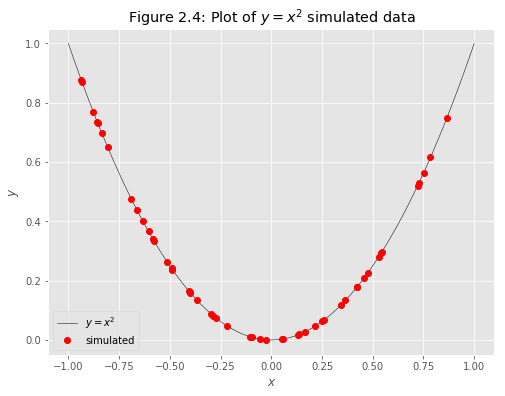

In [38]:
# Line of the equation
xs = np.linspace(-1.0,1.0, 1000)
ys = xs**2
plt.plot(xs, ys, "-", label="$y=x^2$", color="black", linewidth='0.5')

# Generated Samples
plt.plot(x.tolist(), y.tolist(), "o", label="simulated", color="red")

plt.title("Figure 2.4: Plot of $y=x^2$ simulated data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [39]:
print x.describe()

count    50.000000
mean     -0.100928
std       0.534392
min      -0.937000
25%      -0.562275
50%      -0.098400
75%       0.359750
max       0.864700
dtype: float64


### QUESTION: How will we use this data?

## Translating Sample Data into a Suitable Format

Since the `neuralpy` will be used in this example, we need to create a `dataSet` object, which has this general structure:

```
[([x1],[y1]),
 ([x2],[y2]),
 ...,
 ([x_n],[y_n])]
```

In [102]:
# NOTE
# using .ix[] as in the book is depreciated
# use .iloc[] instead for number based indexing
   
count = 0
dataSet = list()
while count < sample_size:
    dataSet.append( ([x.iloc[count]], [y.iloc[count]]) )
    print "Working on data item: {:02d}   x={:+0.4f}  y={:0.4f}".format(count+1, dataSet[count][0][0], dataSet[count][1][0])
    count += 1

# PYTHON 2.7
# If you know Python well, then this is nicer!
# dataSet = [ ([xi],[yi]) for xi,yi in zip(x,y) ]
# for (xs, ys) in dataSet:
#     print "Working on data item: {:02d}   x={:+0.4f}  y={:0.4f}".format(dataSet.index((xs,ys)) + 1, xs[0], ys[0])

Working on data item: 01   x=+0.4758  y=0.2264
Working on data item: 02   x=-0.1026  y=0.0105
Working on data item: 03   x=+0.7847  y=0.6158
Working on data item: 04   x=+0.7506  y=0.5634
Working on data item: 05   x=-0.4870  y=0.2372
Working on data item: 06   x=+0.3657  y=0.1337
Working on data item: 07   x=+0.8647  y=0.7477
Working on data item: 08   x=-0.8361  y=0.6991
Working on data item: 09   x=-0.4067  y=0.1654
Working on data item: 10   x=-0.8568  y=0.7341
Working on data item: 11   x=-0.0265  y=0.0007
Working on data item: 12   x=-0.0539  y=0.0029
Working on data item: 13   x=-0.4015  y=0.1612
Working on data item: 14   x=-0.6901  y=0.4762
Working on data item: 15   x=-0.5783  y=0.3344
Working on data item: 16   x=-0.5834  y=0.3404
Working on data item: 17   x=-0.6630  y=0.4396
Working on data item: 18   x=-0.0942  y=0.0089
Working on data item: 19   x=+0.4216  y=0.1777
Working on data item: 20   x=+0.2576  y=0.0664
Working on data item: 21   x=-0.5142  y=0.2644
Working on da

## A Super Easy Deep Neural Network Python Tool

In [103]:
# CHECKING THE VERSION OF PYTHON BEING USED
import sys
assert(sys.version[0] == '2' and sys.version[2] == '7')

We will create a Deep Neural Network as shown in Figure 2.5 (p. 27)

In [104]:
import neuralpy
# Layer      Nodes
# Input          1
# Hidden_1       3
# Hidden_2       7
# Output         1
fit = neuralpy.Network(1, 3, 7, 1)
fit2 = neuralpy.Network(1, 3, 7, 1)
fit3 = neuralpy.Network(1, 3, 7, 1)

In [105]:
# epochs = 100       # learning iterations
epochs = 50
learning_rate = 1  # for gradient descent

Now we will use the generated samples in our `dataSet` object to __train__ the network

In [106]:
print "Fitting model right now..."
fit.train(dataSet, epochs, learning_rate*0.1)
fit2.train(dataSet, epochs, learning_rate)
fit3.train(dataSet, epochs, learning_rate*10)

Fitting model right now...


## Assessing Model Performance

Now that we have fitted a model with the training data, let's try making some predictions!

In [107]:
count = 0
pred = list()
pred2 = list()
pred3 = list()

while count < sample_size:
    out = fit.forward(x[count])
    out2 = fit2.forward(x[count])
    out3 = fit3.forward(x[count])
#     print "Obs {:02d}:  y={:0.4f}  pred={:0.4f}  err={:+0.4f}".format(count+1, y[count], out[0], y[count] - out[0])
    pred.append(out[0])
    pred2.append(out2[0])
    pred3.append(out3[0])

    count += 1

## Visualize the Results

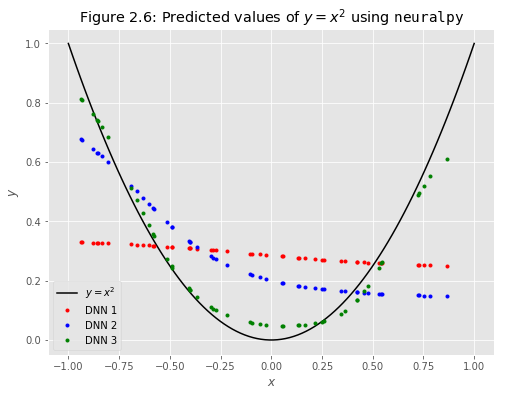

In [110]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

# Line of the equation
xs = np.linspace(-1.0,1.0, 100)
ys = xs**2
plt.plot(xs, ys, "-", label="$y=x^2$", color="black")

# Predictions
plt.plot(x, pred, ".", label="DNN 1", color="red")
plt.plot(x, pred2, ".", label="DNN 2", color="blue")
plt.plot(x, pred3, ".", label="DNN 3", color="green")

# Observed values
# plt.plot(x.values.tolist(), y.tolist(), "o", label="DNN train", color = "blue")

plt.title("Figure 2.6: Predicted values of $y=x^2$ using $\mathtt{neuralpy}$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

### QUESTIONS

+ Did you get the same results as above? Why or why not?
+ Do you know what the model is?
+ How could we improve the results of the network?